## White Patch
Se aplica white-patch a una serie de imágenes en `white_patch/`. En particular `wp_red.jpg` se ve similar al ejemplo visto en clases, pero en `wp_red2.jpg` hay pixeles de color casi blanco, por lo que los gain son cercanos a 1.

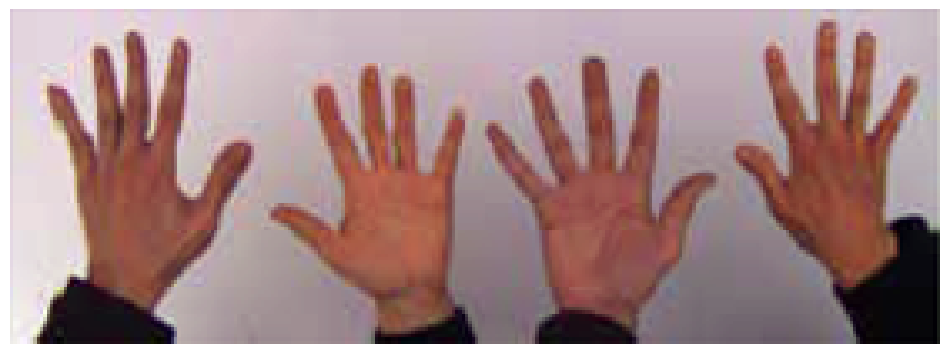

white_patch/test_blue.png


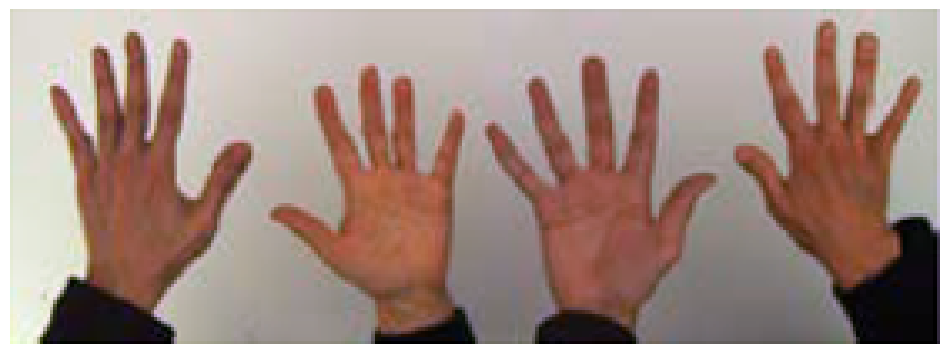

white_patch/test_green.png


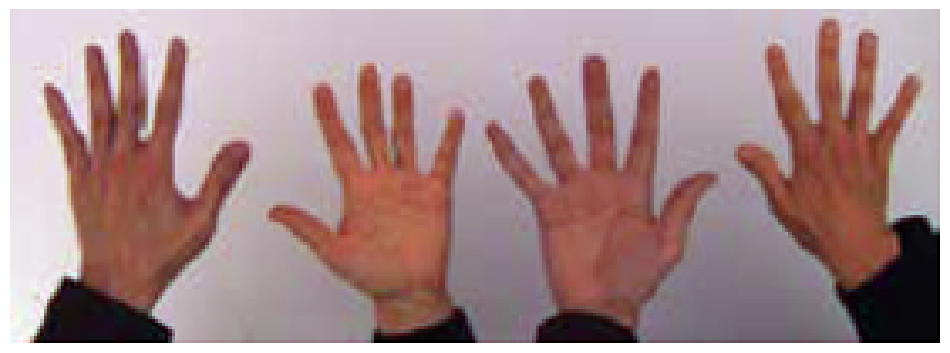

white_patch/test_red.png


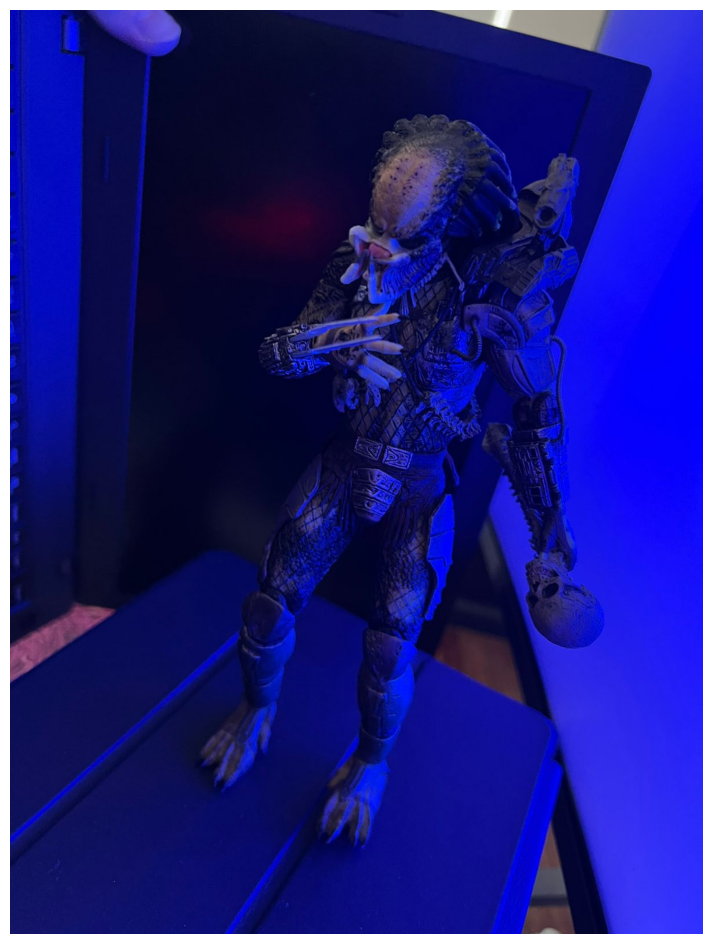

white_patch/wp_blue.jpg


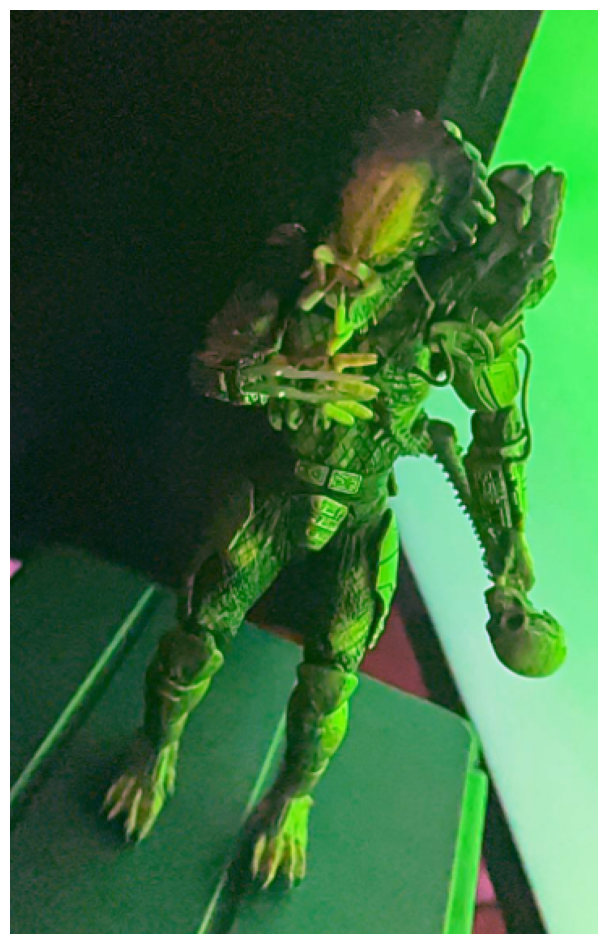

white_patch/wp_green.png


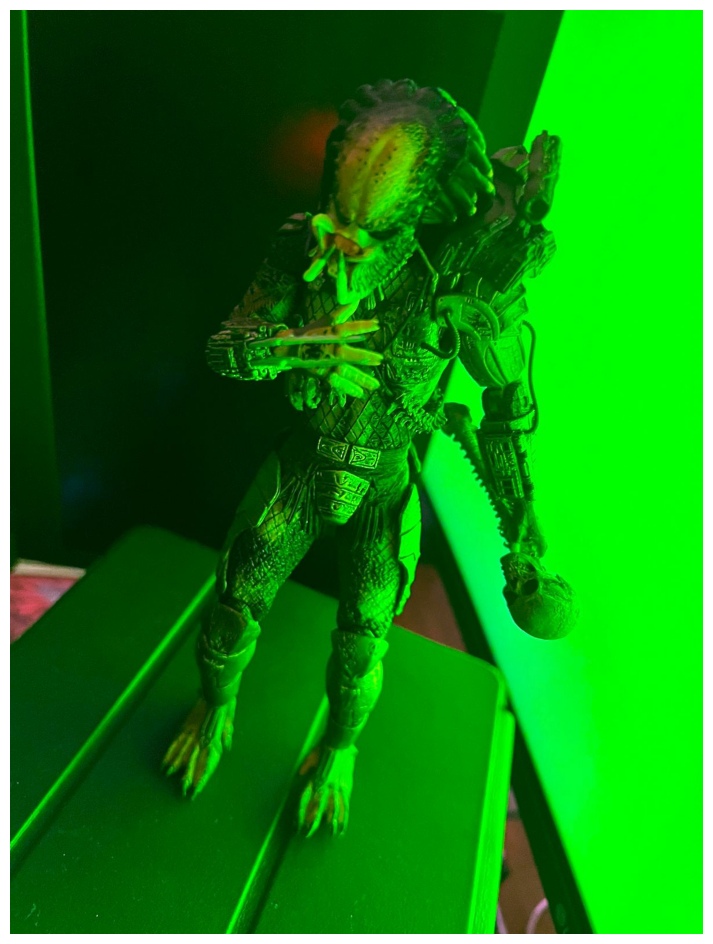

white_patch/wp_green2.jpg


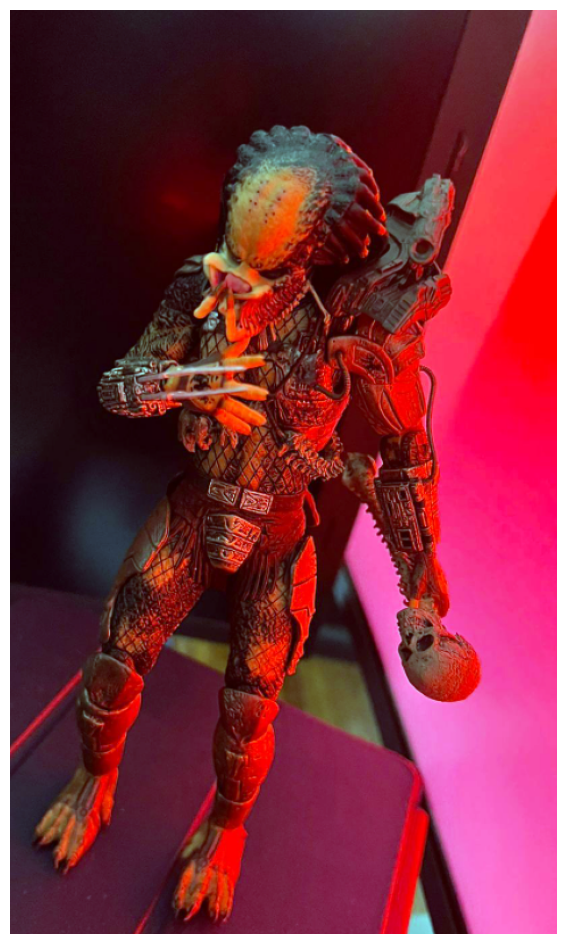

white_patch/wp_red.png


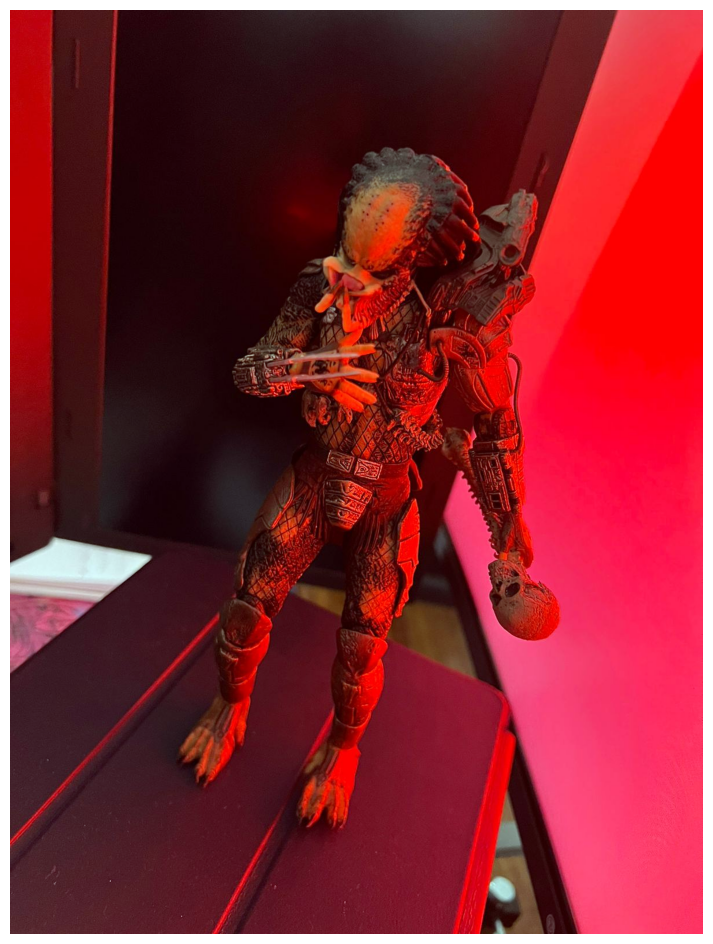

white_patch/wp_red2.jpg


In [ ]:
import cv2 as cv
import numpy as np
import supervision as sv
from pathlib import Path

def white_patch(img_bgr):
    # img_bgr: uint8 BGR
    assert img_bgr.dtype == np.uint8
    img = img_bgr.astype(np.float32)

    # máximos por canal
    peaks = img.reshape(-1, 3).max(axis=0)  # B,G,R

    # evitar división por cero
    peaks = np.maximum(peaks, 1.0)

    gains = 255.0 / peaks  # B,G,R
    balanced = img * gains  
    balanced = np.clip(balanced, 0, 255).astype(np.uint8)
    return balanced


folder = Path("white_patch")

for path in folder.iterdir():
    if path.is_file():
        img = cv.imread(path)        
        wp = white_patch(img) 
        sv.plot_image(wp)
        print(path)

        